# 方程求解
---

求解代数方程组是科学和技术领域中的常见问题。相对于线性方程组，非线性方程组通常较难求解。线性方程是求解非线性问题局部近似解的重要工具。例如，考虑某个展开点附近非常小的变动，非线性系统通常可以使用展开点附近的线性西戎来近似。对于非线性问题的全局分析，一般需要采用迭代方式来逐步构建对解越来越精确的估计

本部分我们将使用SymPy对方程进行符号化求解，使用SciPy的线性代数模块来对方程组进行数值求解。为了解决非线性问题，我们将使用SciPy的optimize模块的`root-finding`函数。

## 导入模块
---


In [19]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import linalg as la
from scipy import optimize

import sympy
sympy.init_printing()

## 线性方程组
---
我们已经在SymPy库中使用了线性代数功能。NumPy和SciPy也有线性代数模块，分别是numpy.linalg和scipy.linalg，它们都为数值问题提供线性代数问题。

[线性方程组](https://zh.m.wikipedia.org/wiki/%E7%BA%BF%E6%80%A7%E6%96%B9%E7%A8%8B%E7%BB%84)是数学方程组的一种，它符合以下的形式：

$$ \begin{cases}
a_{1,1}x_{1} + a_{1,2}x_{2} + \cdots + a_{1,n}x_{n}=  b_{1} \\
a_{2,1}x_{1} + a_{2,2}x_{2} + \cdots + a_{2,n}x_{n}=  b_{2} \\
\vdots \quad \quad \quad \vdots \\
a_{m,1}x_{1} + a_{m,2}x_{2} + \cdots + a_{m,n}x_{n}=  b_{m} 
\end{cases} $$

这是一个包含m个方程、n个未知数的线性方程组。处理线性方程组时，将其写为矩阵的形式会更方便：

$$ \mathbf{A} \mathbf{x} = \mathbf{b} $$

其中

$$\mathbf A=
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m,1} & a_{m,2} & \cdots & a_{m,n}
\end{bmatrix},\quad
\mathbf{x}=
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix},\quad
\mathbf{b}=
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_m
\end{bmatrix}$$

根据矩阵$A$的性质，解$x$可能存在也可能不存在。如果方程组中$m < n$，那么称之为欠定（underdetermined）方程组，不能完全确定唯一解。如果 $m < n$，称之为超定（overdetermined）方程组。这通常会带来约束冲突，导致解不存在。

### 方形方程组

方形方程组（$m = n$）是一个最重要的特例。当方程的数目等于未知数的数目，可能存在唯一解。

有唯一解的前提是矩阵$A$必须是非奇异的，也就是$A$存在逆矩阵，解可以写为$x = A^{-1}b$。

如果行列式为0，即$detA = 0$，则方程组无解或有无穷多解。

对于秩不足的矩，即$rank(A) < n$，矩阵中有的行或者列可以便是成其它行或者列的线性组合，方程组实际上是欠定的。

当$A$满秩时，一定存在解，但是可能无法精确计算解。矩阵的条件数$cond(A)$给出了线性方程组好坏的条件。条件数接近1，方程组是条件良态；条件数很大，方程组是条件病态的。对于病态方程组，即使向量$b$发生非常微小的扰动，也会让解$x$产生很大的误差。这在使用浮点数的数值解中尤其需要注意，因为浮点数只是实数的近似值。

例如，对于如下包含两个线性方程的方程组：

$$
2 x_1 + 3 x_2 = 4
$$

$$
5 x_1 + 4 x_2 = 3
$$

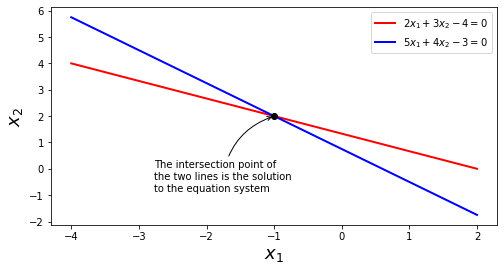

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-4, 2, 100)

x2_1 = (4 - 2 * x1)/3
x2_2 = (3 - 5 * x1)/4

ax.plot(x1, x2_1, 'r', lw=2, label=r"$2x_1+3x_2-4=0$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$5x_1+4x_2-3=0$")

A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
x = la.solve(A, b)

ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("The intersection point of\nthe two lines is the solution\nto the equation system",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend()

#### **符号计算**

In [47]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [48]:
A.rank()  # 满秩有解

In [49]:
A.norm()  # 范数

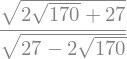

In [50]:
A.condition_number()

In [51]:
sympy.N(A.condition_number(), 4)  # 等价于方法.evalf(4)

求解线性问题最直接的方法是计算矩阵$A$的逆矩阵，但这不是找到解向量$x$的最有效的方法。更好的方法是对矩阵$A$进行[$LU$分解](https://zh.m.wikipedia.org/wiki/LU%E5%88%86%E8%A7%A3)，即$A=LU$，其中$L$是下三角矩阵，$U$是上三角矩阵。

在SymPy中，可以使用`sympy.Matrix`类的`LUdecomposition`方法进行符号$LU$分解。该方法会返回两个新的Matrix对象、$L$和$U$矩阵以及一个行交换矩阵。当我们想要求解$Ax=b$的方程时，不需要显示计算$L$和$U$矩阵，而是使用`LUsolve`方法。

In [52]:
L, U, P = A.LUdecomposition()

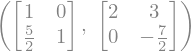

In [53]:
L, U

In [54]:
L * U == A

True

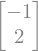

In [55]:
x = A.LUsolve(b)
x

#### **数值计算**

对于数值问题，可以使用SciPy线性代数模块的`la.lu`函数。该函数返回置换矩阵$P$以及$L$和$U$矩阵，是的$A=PLU$。与SymPy情况一样，我们不需要显示计算$L$和$U$矩阵，而是使用`la.solve`来求解线性方程组，该函数将矩阵$A$和向量$b$作为参数。

In [56]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [57]:
np.linalg.matrix_rank(A)

2

In [58]:
np.linalg.norm(A)

In [59]:
np.linalg.cond(A)

In [60]:
P, L, U = la.lu(A)

In [61]:
L, U

(array([[1. , 0. ],
        [0.4, 1. ]]),
 array([[5. , 4. ],
        [0. , 1.4]]))

In [63]:
P@L@U == A # 等价于 np.dot(P, np.dot(L, U))

array([[ True,  True],
       [ True,  True]])

In [64]:
la.solve(A, b)

array([-1.,  2.])

下面我们将演示符号方法和数值方法的区别，并且说明数值方法对大条件数的方程组很敏感。在这个例子中我们将求解的方程组如下：

$$ \begin{bmatrix}
1 & \sqrt{p}  \\
1 & \frac{1}{\sqrt{p}}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
1 \\
2
\end{bmatrix}
$$

当$p$=1时，该方程组是奇异的。当$p$是1附近的值时，方程组是病态条件的。我们使用SymPy可以很容易找到解：

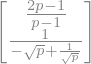

In [65]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
A.solve(b)

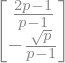

In [66]:
sympy.simplify(_)  # 此处下划线`_`表示上次运行结果

符号解是精确的（如果能找到），数值解的误差是由浮点数引起的，本例中二者的差异与参数p的关系如下图所示:

Text(0.5, 0, '$p$')

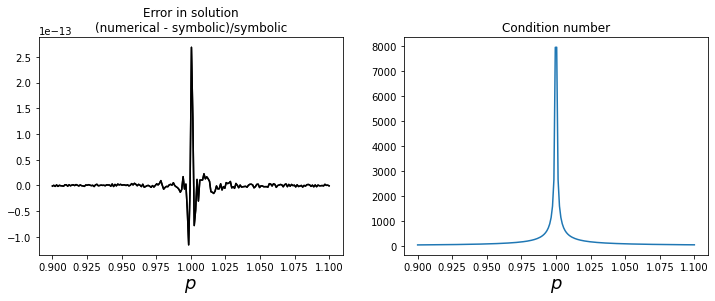

In [70]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Solve symbolically
x_sym_sol = A.solve(b)
x_sym_sol.simplify()
x_sym_sol
Acond = A.condition_number().simplify()

# Function for solving numerically
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph the difference between the symbolic (exact) and numerical results.
p_vec = np.linspace(0.9, 1.1, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18)

### 矩形方程组

#### **欠定方程组**

欠定方程组的变量数比方程数多，解无法唯一确定，必须用自由变量来表示。通常需要用符号方法来处理。

$$ \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
=
\begin{bmatrix}
7 \\
8
\end{bmatrix}
$$

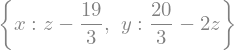

In [72]:
x_vars = sympy.symbols("x, y, z")
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])
sympy.solve(A*x - b, x_vars)

#### **超定方程组**
